<a href="https://colab.research.google.com/github/LeaderTrusty/Eniac-Company/blob/main/Eniac_Cleaning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = 'https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=share_link' # products.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

url = 'https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=share_link' # orders.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

url = 'https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=share_link' # orderlines.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

url = 'https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=share_link' # brands.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [ ]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [ ]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [ ]:
orders.state.value_counts()

Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14379
Cancelled            7233
Name: state, dtype: int64

In [ ]:
orderlines.id_order.count()

293983

In [ ]:
orderlines.id_order.nunique()

204855

In [ ]:
orders.order_id.nunique()

226909

In [ ]:
products.name.nunique()

10373

1. **OrderLines**

In [ ]:
orderlines['unit_price'] = orderlines['unit_price'].str.replace(r'(\d*)\.(\d+)\.(\d+)', r'\1\2.\3').astype(float)

<ipython-input-15-cd51997df153>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  orderlines['unit_price'] = orderlines['unit_price'].str.replace(r'(\d*)\.(\d+)\.(\d+)', r'\1\2.\3').astype(float)


In [ ]:
orderlines['date'] = pd.to_datetime(orderlines['date'])

In [ ]:
orderlines.drop(columns=['product_id'], inplace=True)

2. **Orders**

In [ ]:
orders['created_date'] = pd.to_datetime(orders['created_date'])

In [ ]:
orders['total_paid'] = orders['total_paid'].replace(r'(\d*)\.(\d+)\.(\d+)', r'\1\2.\3')

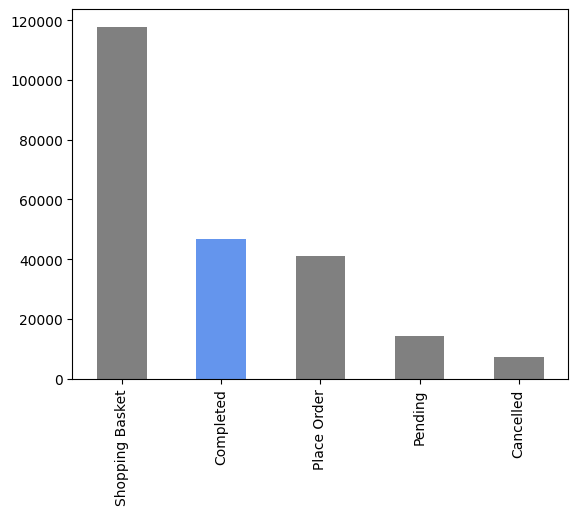

In [ ]:
orders.state.value_counts().plot.bar(color = ['gray', 'cornflowerblue', 'gray', 'gray', 'gray']);

In [ ]:
orders.total_paid.isna().value_counts(normalize=True)

False    0.999978
True     0.000022
Name: total_paid, dtype: float64

In [ ]:
orders = orders.loc[~orders.total_paid.isna(), :]

In [ ]:
orders = orders.loc[orders['state'] == 'Completed']

<Axes: xlabel='created_date'>

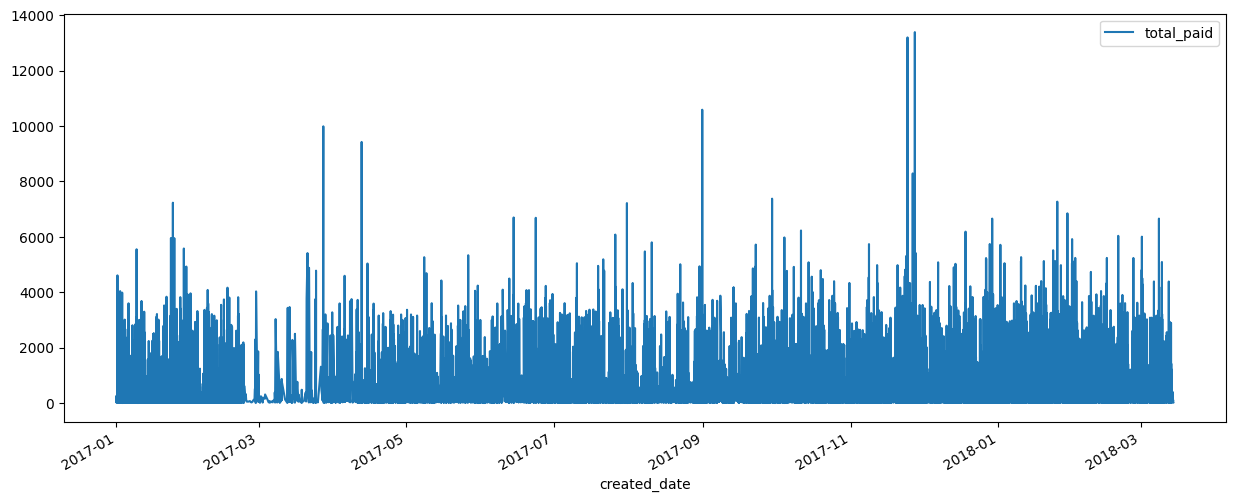

In [ ]:
grouped=orders.groupby('created_date').agg({'total_paid' : 'sum'})
grouped.plot.line(figsize=(15,6))

3. **Products**

In [ ]:
products['price'] = products.price.str.replace(r'(\d*)\.(\d+)\.(\d+)', r'\1\2.\3').astype(float)

<ipython-input-25-5da882bd05df>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  products['price'] = products.price.str.replace(r'(\d*)\.(\d+)\.(\d+)', r'\1\2.\3').astype(float)


In [ ]:
products.drop(columns=['promo_price'], inplace=True)

In [ ]:
products.drop_duplicates(subset='sku', inplace=True)

In [ ]:
products.groupby('type').count()

,sku,name,desc,price,in_stock
type,,,,,
"1,02E+12",159,159,159,159,159
"1,44E+11",234,234,234,234,234
"1,46E+11",6,6,6,6,6
10142,23,23,23,23,23
101781405,12,12,12,12,12
...,...,...,...,...,...
85641716,33,33,33,33,33
85651716,42,42,42,42,42
8696,58,58,58,57,58


In [ ]:
products['price'].nlargest(50)

16608    352559.394
16812    336559.443
16824    336559.443
16834    336559.443
16836    336559.443
16828    300559.402
16838    300559.402
16832    237559.421
16840    237559.421
17487    115900.092
16127     92197.644
19248     84900.013
19249     84900.013
11822     83281.154
898       69989.909
941       69989.909
16001     51577.892
16000     50917.885
14706     50799.902
16602     49655.944
16610     49655.944
11765     49033.072
16004     46698.692
16003     46038.685
15993     43577.892
19252     42999.044
15981     42917.885
12301     41900.001
15992     40377.892
15998     40298.692
16609     40055.949
15980     39717.885
15986     39638.685
14707     36279.902
16822     36055.943
16844     36055.943
19181     35998.952
15923     34847.892
15922     34187.885
15991     33977.892
15979     33317.885
16826     32455.951
16837     32455.951
15997     31978.692
15926     31798.392
15198     31489.996
14708     31439.902
15985     31318.685
16820     31255.946
16835     31255.946
